In [ ]:
# Author: Banafsheh Khazali
# Date: Feb 06, 2023

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os
from os import listdir
from os.path import join, isfile

## Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


uncomment these two lines if your data is zipped

In [ ]:
# !unzip -q "/content/drive/My Drive/Classification/synth_csv.zip" -d "/content/drive/My Drive/Classification/synth_csv"


In [ ]:
# !unzip -q "/content/drive/My Drive/Classification/synth_csv_yes.zip" -d "/content/drive/My Drive/Classification/synth_csv_yes"


In [ ]:
import os

folder1_path = "/content/drive/My Drive/Classification/synth_csv_no/"
folder2_path = "/content/drive/My Drive/Classification/synth_csv_yes/"

files_folder1 = [f for f in os.listdir(folder1_path) if os.path.isfile(os.path.join(folder1_path, f))]
files_folder2 = [f for f in os.listdir(folder2_path) if os.path.isfile(os.path.join(folder2_path, f))]

print("Files in folder 1:", files_folder1)
print("Files in folder 2:", files_folder2)


Files in folder 1: ['syn_0_new600n4.csv', 'syn_0_new600n3.csv', 'syn_0_new600n2.csv', 'syn_0_new600n1.csv', 'syn_0_new600n0.csv']
Files in folder 2: ['syn_0_new600y6.csv', 'syn_0_new600y5.csv', 'syn_0_new600y4.csv', 'syn_0_new600y3.csv', 'syn_0_new600y2.csv', 'syn_0_new600y1.csv', 'syn_0_new600y0.csv']


In [ ]:
yesFile = folder2_path
noFile = folder1_path

In [ ]:
files = [f for f in os.listdir(yesFile) if f.endswith(".csv")]

if not files:
    print("No csv files found in the folder.")
else:
    first_file = files[0]
    first_file_path = os.path.join(yesFile, first_file)
    df = pd.read_csv(first_file_path)
df.head()

,time,IL2DL,IL2VL,IL2L,URADL,IL1VL,IL2DR,IL1DL,OLLL,IL1L,...,PVWL,PVWR,PLNL,PHCR,PHCL,PVNR,PLMR,PVNL,PLML,label
0,2023-02-07 11:48:22.823002,1.168040,-0.320413,0.138696,-0.322412,-0.155492,1.194473,0.003841,0.105247,-0.094725,...,16.220034,-11.068125,-1.537057,-0.904571,-2.101386,-0.196867,-106.859134,1.312944,-14.640862,1
1,2023-02-07 11:48:23.823016,1.092696,-0.303907,0.137085,-0.323400,-0.152285,1.117424,0.002735,0.100102,-0.092786,...,16.463869,-11.109647,-1.486101,-0.845103,-1.976405,-0.188979,-105.529855,1.275552,-14.576710,1
2,2023-02-07 11:48:24.823019,1.022214,-0.288048,0.135557,-0.324009,-0.149053,1.045346,0.001734,0.095219,-0.090833,...,16.705141,-11.152412,-1.436445,-0.790220,-1.865457,-0.181454,-104.168626,1.239144,-14.521279,1
3,2023-02-07 11:48:25.823021,0.956277,-0.272826,0.134094,-0.324113,-0.145783,0.977917,0.000837,0.090577,-0.088859,...,16.943157,-11.197030,-1.388123,-0.739685,-1.767283,-0.174275,-102.775102,1.203565,-14.473118,1
4,2023-02-07 11:48:26.823023,0.894591,-0.258226,0.132676,-0.323584,-0.142458,0.914835,0.000043,0.086155,-0.086856,...,17.177252,-11.244031,-1.341155,-0.693305,-1.680731,-0.167428,-101.348077,1.168657,-14.430965,1


# Method 1: Using different classifiers

in the first section, I use decision tree, random forest, and svm to classify the data in two classes of 0 and 1. 

In [ ]:
label_1_files = [yesFile + f for f in listdir(yesFile) if isfile(join(yesFile, f))]
label_1_dfs = [pd.read_csv(file) for file in label_1_files]



# Load the csv files with label 0 into a list of dataframes

label_0_files = [noFile + f for f in listdir(noFile) if isfile(join(noFile, f))]
label_0_dfs = [pd.read_csv(file) for file in label_0_files]

# Combine all the dataframes into a single dataframe
data = pd.concat(label_1_dfs + label_0_dfs)
data.drop(labels='time', axis=1, inplace = True)

# Get the X and y values for training
X = data.iloc[:, :-1].values

y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a logistic regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Train a decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Train a random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Train a support vector machine classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)


Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Support Vector Machine Accuracy: 1.0


Now, 
'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'K-Nearest Neighbors',
    'Support Vector Classifier'

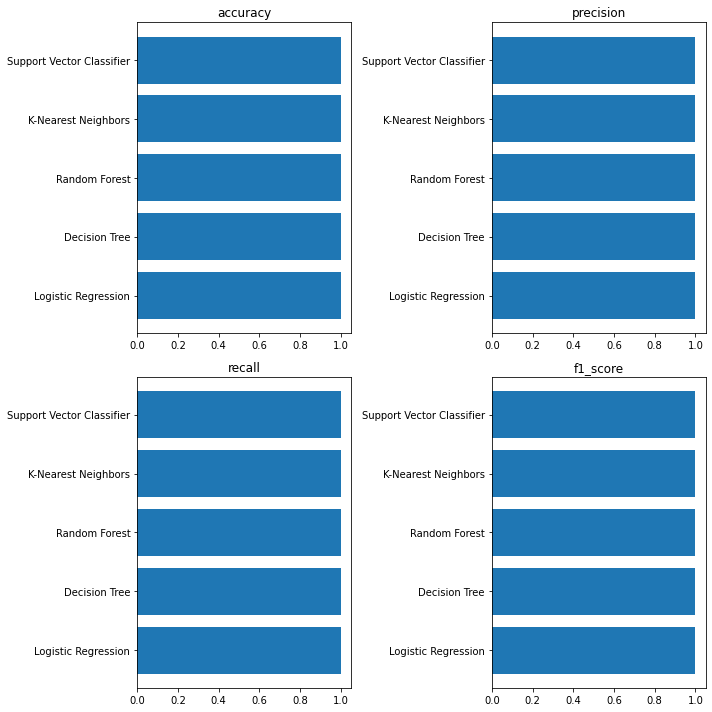

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(kernel='linear', random_state=0)
]

classifier_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'K-Nearest Neighbors',
    'Support Vector Classifier'
]

results = {}

for classifier, name in zip(classifiers, classifier_names):
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax = ax.ravel()

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics):
  values = [results[name][metric] for name in classifier_names]
  ax[i].barh(classifier_names, values)
  ax[i].set_title(metric)

plt.tight_layout()
plt.show()


Same classifiers but with plotting their confusion matrix

Classifier: LogisticRegression
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[616   0]
 [  0 805]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

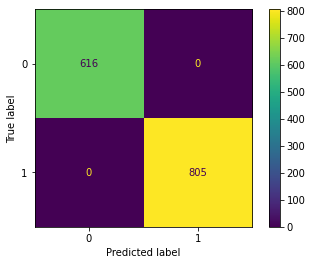

Classifier: KNeighborsClassifier
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[616   0]
 [  0 805]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

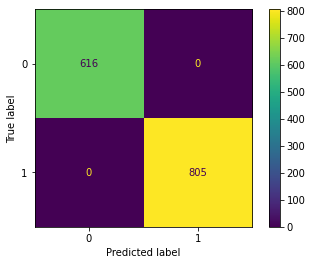

Classifier: SVC
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[616   0]
 [  0 805]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

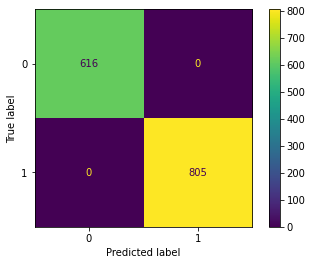

Classifier: DecisionTreeClassifier
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[616   0]
 [  0 805]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

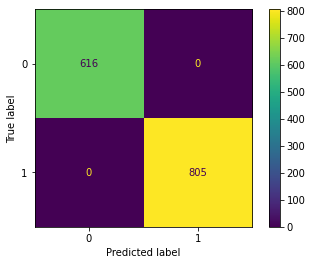

Classifier: RandomForestClassifier
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[616   0]
 [  0 805]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x504 with 0 Axes>

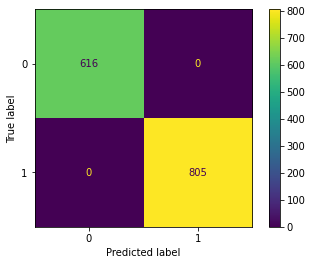

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# read the csv files from two folders
# folder1 = '/path/to/folder1'
# folder2 = '/path/to/folder2'

# files1 = [os.path.join(folder1, f) for f in os.listdir(folder1) if f.endswith('.csv')]
# files2 = [os.path.join(folder2, f) for f in os.listdir(folder2) if f.endswith('.csv')]

# data1 = pd.concat([pd.read_csv(f) for f in files1], axis=0)
# data2 = pd.concat([pd.read_csv(f) for f in files2], axis=0)

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# iterate over the classifiers and fit, predict and evaluate
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("Classifier:", clf.__class__.__name__)
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*60)
    
    # plot the confusion matrix
    plt.figure(figsize=(7, 7))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=['0', '1'])
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import precision_recall_fscore_support
from sklearn.inspection import permutation_importance

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the three classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=0)
xgb_clf = xgb.XGBClassifier(random_state=0)
lgb_clf = lgb.LGBMClassifier(random_state=0)

# Fit the models to the training data
rf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
lgb_clf.fit(X_train, y_train)

# Predict the labels for the testing data
rf_pred = rf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)
lgb_pred = lgb_clf.predict(X_test)

# Calculate the precision, recall, and f-score for each model
rf_precision, rf_recall, rf_fscore, _ = precision_recall_fscore_support(y_test, rf_pred, average='binary')
xgb_precision, xgb_recall, xgb_fscore, _ = precision_recall_fscore_support(y_test, xgb_pred, average='binary')
lgb_precision, lgb_recall, lgb_fscore, _ = precision_recall_fscore_support(y_test, lgb_pred, average='binary')

# Print the results
print("Random Forest: Precision = {:.3f}, Recall = {:.3f}, F-score = {:.3f}".format(rf_precision, rf_recall, rf_fscore))
print("XGBoost: Precision = {:.3f}, Recall = {:.3f}, F-score = {:.3f}".format(xgb_precision, xgb_recall, xgb_fscore))
print("XGBoost: Precision = {:.3f}, Recall = {:.3f}, F-score = {:.3f}".format(lgb_precision, lgb_recall, lgb_fscore))


Random Forest: Precision = 1.000, Recall = 1.000, F-score = 1.000
XGBoost: Precision = 1.000, Recall = 1.000, F-score = 1.000
XGBoost: Precision = 1.000, Recall = 1.000, F-score = 1.000


## Find the most important features

it is possible to plot the most important features of your data. 

1. One common approach is to use feature importances from tree-based models, such as Random Forest or Gradient Boosting, and plot them using a bar chart or a feature importance plot.

2. Another approach is to use permutation importance, which measures the decrease in model performance when a feature is randomly permuted. 

3. LASSO or Ridge regression to identify the most important features by checking the coefficients of each feature.


1. Random Forest Classifier

Accuracy: 1.0
Confusion Matrix:
 [[616   0]
 [  0 805]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1421
   macro avg       1.00      1.00      1.00      1421
weighted avg       1.00      1.00      1.00      1421



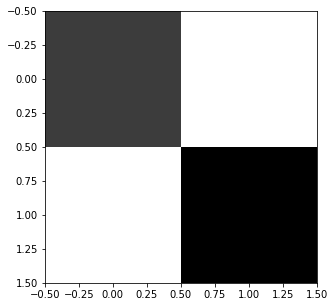

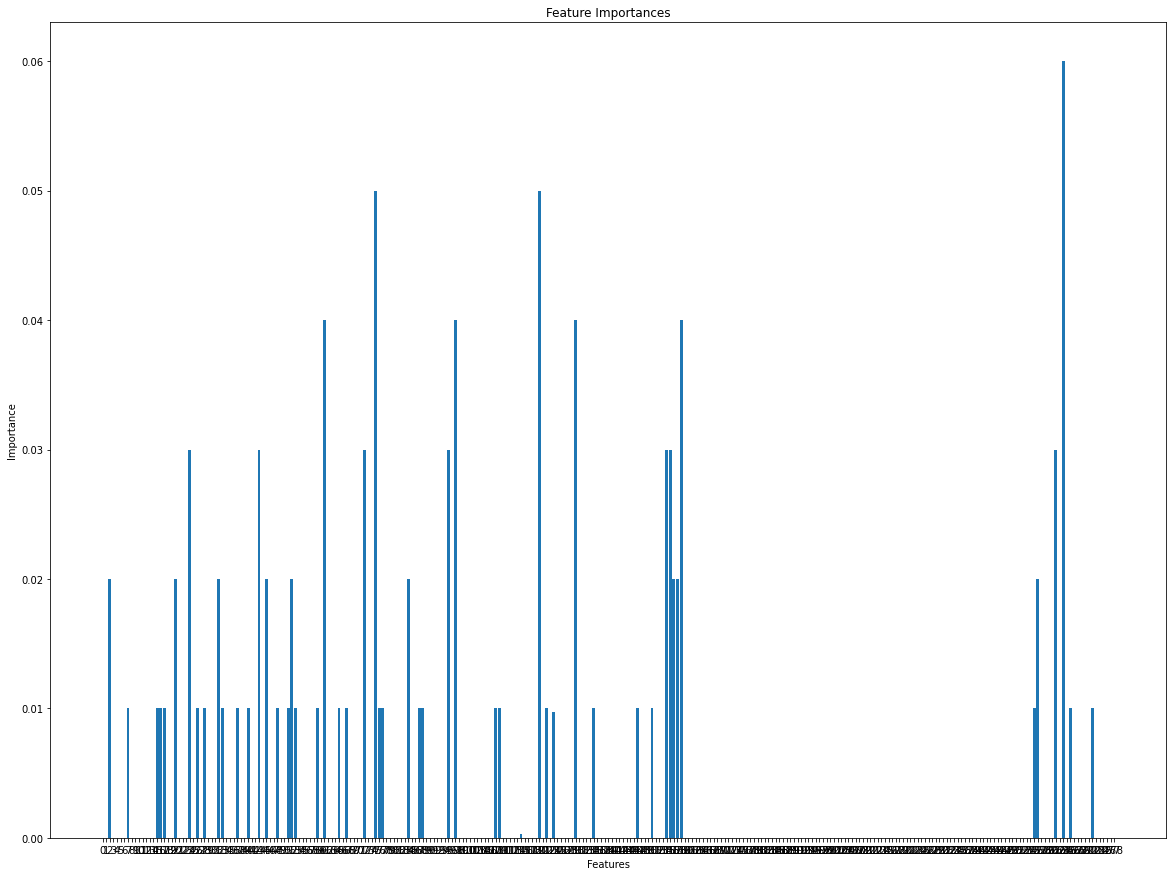

[2, 20, 24, 32, 43, 45, 52, 61, 72, 75, 84, 95, 97, 120, 130, 155, 156, 157, 158, 159, 257, 262, 264]
The most important neurons for the classifiction task are:  ['IL2L', 'IL1R', 'URBR', 'OLQVR', 'URXL', 'RMDVR', 'URXR', 'RMDR', 'ADLR', 'ASIL', 'RIVL', 'RMFL', 'SIBVR', 'SMBVL', 'SIAVR', 'RIGR', 'RMGL', 'RMGR', 'RIFL', 'AVG', 'PHAR', 'PHBR', 'PHBL']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(confusion_matrix(y_test, y_pred), cmap='binary', interpolation='None')
plt.show()


importances = clf.feature_importances_


# Plot the feature importances
plt.figure(figsize=(20,15))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)))
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


# Get feature importances
true_index = []

importances1 = importances > 0.01
def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
    print(true_index)
   
result = []
neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(importances1)
for i in true_index:
    result.append(neuron_names[i])

print("The most important neurons for the classifiction task are: ", result)







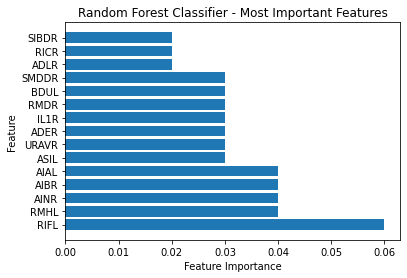

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier on the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Get the index of the most important features
sorted_index = np.argsort(importances)[::-1][:15]

# Plot the most important features
plt.barh(X.columns[sorted_index], importances[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Classifier - Most Important Features")
plt.show()


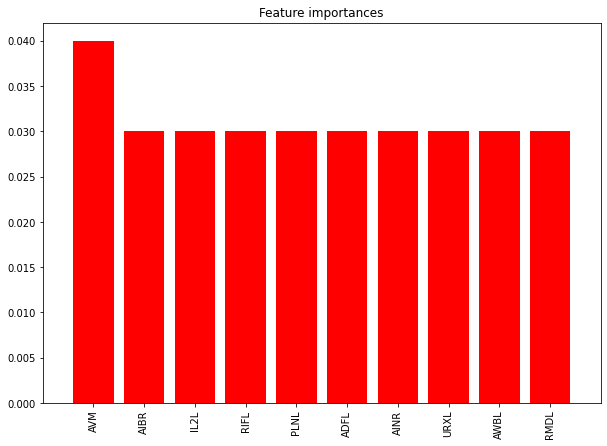

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define the two folders of csv files 
def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
# Split the data into features and labels
features = data.drop(["time", "label"], axis=1)
labels = data["label"]

# Train a Random Forest Classifier on the data
clf = RandomForestClassifier()
clf.fit(features, labels)

# Get feature importances and sort them in descending order
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 10 important features
plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(range(10), importances[indices][:10], color="r", align="center")
plt.xticks(range(10), features.columns[indices][:10], rotation=90)
plt.xlim([-1, 10])
plt.show()


I have two folders of csv files. one folder includes timeseries csv files which have a column of label 1. the other folder includes timeseries csv files which have a column of label 0. the shape of these csv files are (599, 281). The first column includes time an the column name is "time". The rest of columns are different features. after a classification task write a code to show which features were the most important ones using Gradient Boosting technique? I also want you to plot the most important features too.
Here's a code example for using Gradient Boosting with feature importance for the classification task:

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       616
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1421
   macro avg       1.00      1.00      1.00      1421
weighted avg       1.00      1.00      1.00      1421



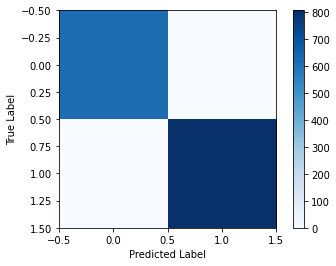

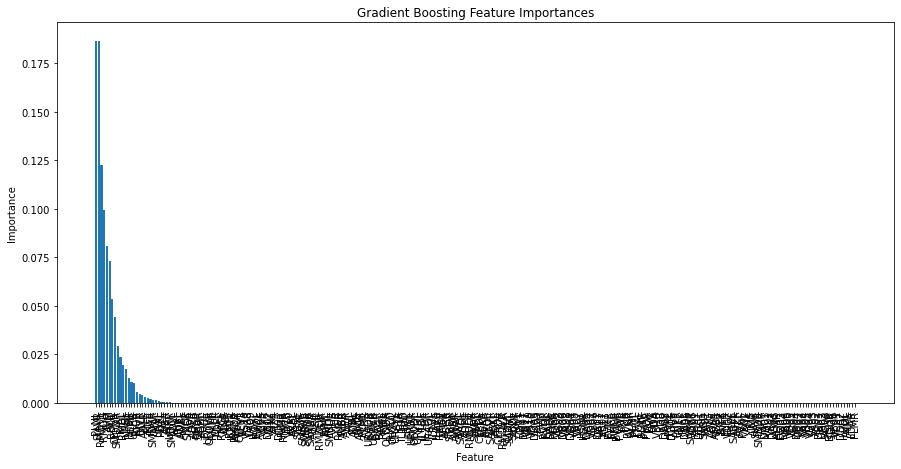

[16, 24, 37, 40, 48, 51, 64, 108, 130, 157, 176, 192, 196, 262, 272]
The most important neurons for the classifiction task are:  ['URBL', 'URBR', 'CEPVR', 'RMDVL', 'RIAL', 'RMDL', 'RIH', 'SMDDR', 'SIAVR', 'RMGR', 'BDUL', 'AVM', 'ALML', 'PHBR', 'PLNL']


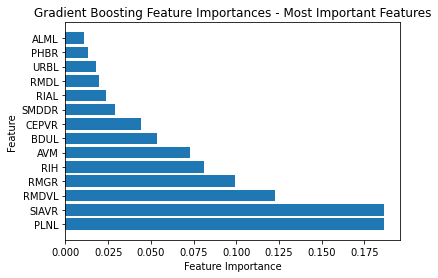

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def load_data(folder_path, label):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    data = pd.DataFrame()
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['label'] = label
        

        data = data.append(df, ignore_index=True)
    return data

data1 = load_data(noFile, 0)
data2 = load_data(yesFile, 1)

data = data1.append(data2, ignore_index=True)
data.drop(labels='time', axis=1, inplace = True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the feature importances
importances = gb.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(15,7))
plt.bar(X.columns[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Gradient Boosting Feature Importances")
plt.show()



# Get feature importances
true_index = []

importances1 = importances > 0.01
def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
    print(true_index)
   
result = []
neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(importances1)
for i in true_index:
    result.append(neuron_names[i])

print("The most important neurons for the classifiction task are: ", result)



sorted_index = np.argsort(importances)[::-1][:14]
# Plot the most important features
plt.barh(X.columns[sorted_index], importances[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Gradient Boosting Feature Importances - Most Important Features")
plt.show()


3. Lasso or Ridge model

Lasso and Ridge are both regularization techniques used in linear regression to prevent overfitting by adding a penalty term to the loss function. The main difference between the two is the way the penalty term is applied.

Lasso (Least Absolute Shrinkage and Selection Operator) adds a penalty term to the loss function that is proportional to the absolute value of the coefficients, with the goal of shrinking the less important feature coefficients to zero, effectively performing feature selection. Lasso can be seen as a trade-off between achieving a good fit and feature selection.

Ridge Regression, on the other hand, adds a penalty term to the loss function that is proportional to the square of the coefficients. The goal of this technique is to shrink the coefficients towards zero, but it will not set any coefficient exactly to zero. This makes Ridge Regression more suitable for problems where all the features are important, and we want to include all of them in the model.

In terms of feature importance, Lasso can be used to determine which features are most important in the model, as the features with the non-zero coefficients are considered to be the most important. In Ridge Regression, the magnitude of the coefficients can be used to determine the importance of the features, with larger coefficients indicating a more important feature.

It's important to note that both Lasso and Ridge Regression are linear models, and their feature importance is based on the magnitude or presence of the coefficients in the model, not on any particular feature interpretation or insight.

You can change the regularization strength or switch to Ridge regression by changing the model definition.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e-01, tolerance: 1.393e-01
  model = cd_fast.enet_coordinate_descent(


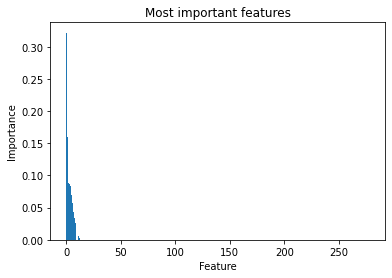

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

# Load the csv files from the two folders and combine them into a single dataframe
folder1 = yesFile
folder2 = noFile

files1 = [folder1 + f for f in os.listdir(folder1) if f.endswith(".csv")]
files2 = [folder2 + f for f in os.listdir(folder2) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)

# Split the data into training and testing sets
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso or Ridge model
model = Lasso(alpha=0.01) # Change to Ridge(alpha=0.01) for Ridge regression
model.fit(X_train, y_train)

# Calculate the feature importances
coef = model.coef_
imp = np.abs(coef)
imp /= imp.sum()
imp = np.sort(imp)[::-1]

# Plot the most important features
plt.bar(np.arange(X.shape[1]), imp)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Most important features")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e-01, tolerance: 1.393e-01
  model = cd_fast.enet_coordinate_descent(


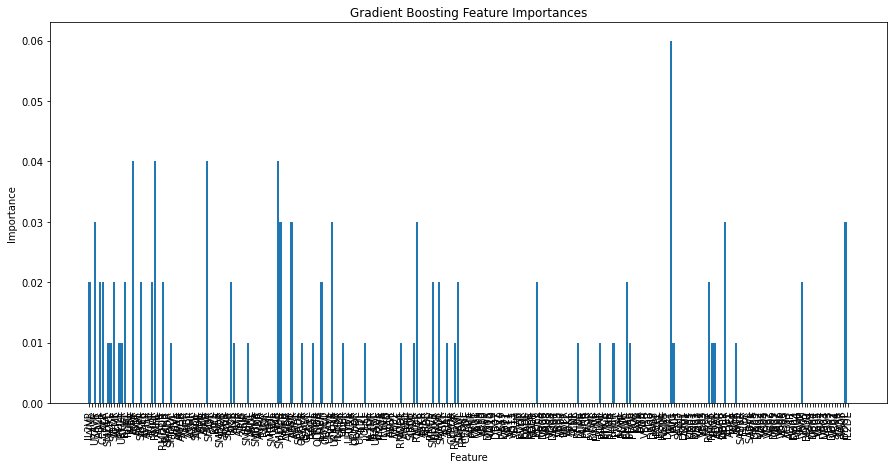

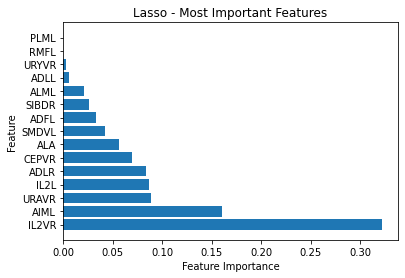

In [ ]:
# Load the csv files from the two folders and combine them into a single dataframe
folder1 = yesFile
folder2 = noFile

files1 = [folder1 + f for f in os.listdir(folder1) if f.endswith(".csv")]
files2 = [folder2 + f for f in os.listdir(folder2) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)

# Split the data into training and testing sets
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso or Ridge model
model = Lasso(alpha=0.01) # Change to Ridge(alpha=0.01) for Ridge regression
model.fit(X_train, y_train)

# Calculate the feature importances
coef = model.coef_
imp = np.abs(coef)
imp /= imp.sum()
sorted_idx = np.argsort(imp)[::-1]


plt.figure(figsize=(15,7))
plt.bar(X.columns[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Lasso Feature Importances")
plt.show()


# Get feature importances
true_index = []
result = []

def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
       

neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(imp)
for i in true_index:
    result.append(neuron_names[i])

sorted_index = np.argsort(imp)[::-1][:15]
# Plot the most important features
plt.barh(X.columns[sorted_index], imp[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Lasso - Most Important Features")
plt.show()



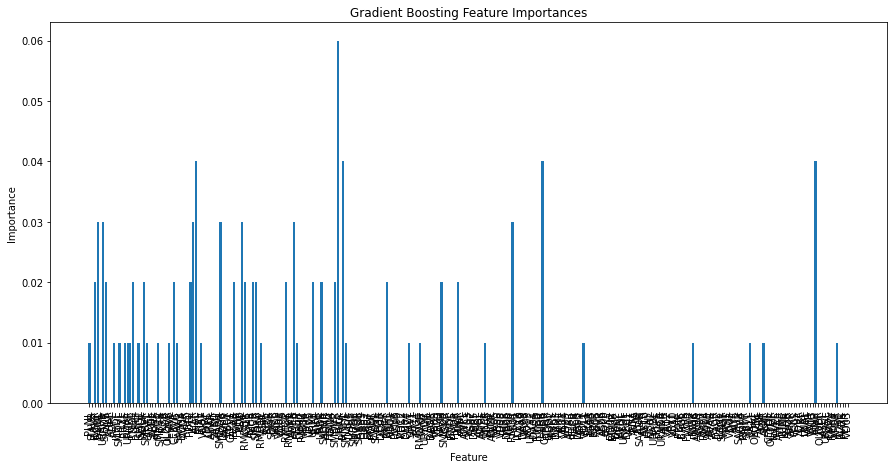

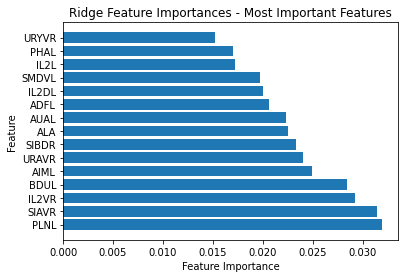

In [ ]:
# Load the csv files from the two folders and combine them into a single dataframe
folder1 = yesFile
folder2 = noFile

files1 = [folder1 + f for f in os.listdir(folder1) if f.endswith(".csv")]
files2 = [folder2 + f for f in os.listdir(folder2) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)

# Split the data into training and testing sets
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the Lasso or Ridge model
model = Ridge(alpha=0.01) # Change to Ridge(alpha=0.01) for Ridge regression
model.fit(X_train, y_train)

# Calculate the feature importances
coef = model.coef_
imp = np.abs(coef)
imp /= imp.sum()
sorted_idx = np.argsort(imp)[::-1]


plt.figure(figsize=(15,7))
plt.bar(X.columns[sorted_idx], importances[sorted_idx])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Ridge Feature Importances")
plt.show()


# Get feature importances
true_index = []
result = []

def find_index_of_true(lst):
    for i, value in enumerate(lst):
        if value == True:
          true_index.append(i)
       

neuron_names = data.columns.tolist()
neuron_names
find_index_of_true(imp)
for i in true_index:
    result.append(neuron_names[i])

sorted_index = np.argsort(imp)[::-1][:15]
# Plot the most important features
plt.barh(X.columns[sorted_index], imp[sorted_index])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Ridge Feature Importances - Most Important Features")
plt.show()



4. Deep Learning

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder1 = yesFile
folder2 = noFile

files1 = [folder1 + f for f in os.listdir(folder1) if f.endswith(".csv")]
files2 = [folder2 + f for f in os.listdir(folder2) if f.endswith(".csv")]

df1 = pd.concat([pd.read_csv(f) for f in files1])
# df1["label"] = 1
df2 = pd.concat([pd.read_csv(f) for f in files2])
# df2["label"] = 0

df = pd.concat([df1, df2])
df.drop(labels='time', axis=1, inplace = True)
# Combine the two dataframes and create a label column, with 1 for the first dataframe and 0 for the second
df = pd.concat([df1, df2])
df['label'] = np.concatenate([np.ones(len(df1)), np.zeros(len(df2))])

# Split the data into input features (X) and labels (y)
X = df.drop(columns=['label'])
y = df['label']

X1 = X 
# Normalize the input features
X = (X - X.mean()) / X.std()
X = tf.convert_to_tensor(X.values, dtype=tf.float32)
y = tf.convert_to_tensor(y.values, dtype=tf.float32)


# Create a deep learning model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10)

# Get the weights of the model
weights = model.layers[0].get_weights()[0]


# Calculate the absolute value of the weights for each feature
feature_importance = np.abs(weights).mean(axis=0)
feature_importance



# Plot the feature importance
# plt.bar(X1.columns, feature_importance)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.xticks(rotation=90)
# plt.show()



# print(type(X))
# print(X)
# print(X.shape)



# print(type(y))
# print(y)
# print(y.shape)

<ipython-input-167-1b2de875ff43>:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = (X - X.mean()) / X.std()


Epoch 1/10
222/222 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4217
Epoch 2/10
222/222 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4217
Epoch 3/10
222/222 [==============================] - 2s 9ms/step - loss: nan - accuracy: 0.4217
Epoch 4/10
222/222 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4217
Epoch 5/10
222/222 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4217
Epoch 6/10
222/222 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4217
Epoch 7/10
222/222 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4217
Epoch 8/10
222/222 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4217
Epoch 9/10
222/222 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4217
Epoch 10/10
222/222 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4217
[[nan nan nan ... nan nan nan